## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

capa_path = "sensor_data/June_01_2023/capas_new_a.csv"
x_path = "sensor_data/June_01_2023/x_new_a.csv"
y_path = "sensor_data/June_01_2023/y_new_a.csv"

skip_rows = [93, 96, 187, 202, 264, 379, 459]
# bad_rows = [325, 326, 462]

capas = pd.read_csv(capa_path, skiprows = skip_rows)
xs = pd.read_csv(x_path, error_bad_lines=False)
ys = pd.read_csv(y_path, error_bad_lines=False)

# capas = capas.drop(bad_rows)
# xs = xs.drop(bad_rows)
# ys = ys.drop(bad_rows)

/var/folders/l9/cl6_9fzj575cg7ksq7xp8w540000gn/T/ipykernel_67436/860919503.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  xs = pd.read_csv(x_path, error_bad_lines=False)
b'Skipping line 93: expected 29 fields, saw 30\nSkipping line 96: expected 29 fields, saw 30\nSkipping line 187: expected 29 fields, saw 30\nSkipping line 202: expected 29 fields, saw 30\nSkipping line 264: expected 29 fields, saw 30\nSkipping line 379: expected 29 fields, saw 30\nSkipping line 459: expected 29 fields, saw 30\n'
/var/folders/l9/cl6_9fzj575cg7ksq7xp8w540000gn/T/ipykernel_67436/860919503.py:18: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ys = pd.read_csv(y_path, error_bad_lines=False)
b'Skipping line 93: expected 29 fields, saw 30\nSkipping line 96: expected 29 fields, saw 30\nSkipping line 187: expected 29 fi

## Pre-processing the data
remove outlier

In [2]:
def calculate_angle(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return np.arctan2(dy, dx)

def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

(h, w) = xs.shape

angles = np.zeros((h, w-1))  # Initialize an empty array for the angles
distances = np.zeros((h, w-1))  # Initialize an empty array for the distances

for i in range(28):
    angles[:, i] = calculate_angle(xs.iloc[:, i+1], ys.iloc[:, i+1], xs.iloc[:, i], ys.iloc[:, i])-np.pi/2
    distances[:, i] = calculate_distance(xs.iloc[:, i], ys.iloc[:, i], xs.iloc[:, i+1], ys.iloc[:, i+1])

angles_degrees = np.degrees(angles)
accumulated_angles = np.cumsum(angles, axis=1)

In [3]:
max_dis = np.max(distances, axis=0)
max_idx = np.argmax(distances, axis=0)

min_dis = np.min(distances, axis=0)
min_idx = np.argmin(distances, axis=0)

mean_dis = np.mean(distances, axis=0)

print("the mean distance is:", mean_dis)
print("the min distance is:", min_dis, "index is", min_idx)
print("the max distance is:", max_dis, "index is", max_idx)

the mean distance is: [3.38209017 3.66444238 3.19296561 3.39009218 3.00289675 3.94562117
 3.15555626 3.55637091 3.16886859 3.57891621 3.60111142 3.58778003
 3.43377759 3.80398633 3.45025215 3.92908609 3.62026185 3.84446706
 3.68606931 3.82156288 3.88212706 3.84196019 3.71075899 4.15187527
        nan        nan        nan        nan]
the min distance is: [3.04172952 3.2788009  2.83782265 3.06468336 2.68472348 3.07526122
 2.80456284 3.20825718 2.82621857 3.27206626 3.3169235  3.30310293
 3.16200309 3.42808864 3.18690917 1.01454    2.79804356 3.38391296
 3.32036966 3.48587965 3.55928626 3.40911441 3.37400029 3.77020987
        nan        nan        nan        nan] index is [352 325  63 400 513 325  67 462 430 133 204  17 443 325 523 210 539 530
  74 161 346 360 412  85 326 325  84  81]
the max distance is: [ 7.11796128 10.15320895 10.23358607  6.3723578   3.89248706  4.36803848
  3.96190535  3.89149957  3.73317636  3.87655189  3.93256957  3.97649208
  3.91699822  4.11668937  4.10304841  

In [4]:
mean_dis = np.mean(distances, axis=0)

# Calculate thresholds for 50% higher and lower than the mean
higher_threshold = mean_dis * 1.5
lower_threshold = mean_dis * 0.5

# Create a mask for rows where any value is not within the desired range
mask = np.any((distances < lower_threshold) | (distances > higher_threshold), axis=1)

# Invert the mask using ~, then use it to filter the DataFrame
distances_filtered = distances[~mask]
angles_filtered = angles[~mask]

In [5]:
max_dis = np.max(distances_filtered, axis=0)
max_idx = np.argmax(distances_filtered, axis=0)

min_dis = np.min(distances_filtered, axis=0)
min_idx = np.argmin(distances_filtered, axis=0)

mean_dis = np.mean(distances_filtered, axis=0)

print("the mean distance is:", mean_dis)
print("the min distance is:", min_dis, "index is", min_idx)
print("the max distance is:", max_dis, "index is", max_idx)

the mean distance is: [3.38224616 3.64583904 3.19236026 3.38173301 3.00463472 3.94372574
 3.16378435 3.54738328 3.18001905 3.57289755 3.60968634 3.58155893
 3.43934798 3.80428992 3.45298504 3.93225341 3.19739408 3.85789543
 3.65533444 3.81551963 3.88178909 3.86974159 3.64497184 4.18237454
 3.93732508 4.08965691 3.99584456 4.83770041]
the min distance is: [3.04172952 3.34035715 2.83782265 3.06468336 2.68472348 3.59741707
 2.80456284 3.27748354 2.82621857 3.27206626 3.3169235  3.30310293
 3.16200309 3.48919171 3.20162429 3.63150054 2.79804356 3.449436
 3.32036966 3.48587965 3.61907905 3.53799472 3.37400029 3.88318415
 3.68324788 3.82421273 3.71318588 4.54163321] index is [318 115  63 363 463 236  67  31 390 119 184  17 397 365 174  21 476 370
  74 147 480 308 374  38 390 417 231  25]
the max distance is: [3.70743513 4.0119831  3.53552486 3.62151685 3.32793864 4.36803848
 3.4770111  3.89149957 3.47345964 3.87655189 3.93256957 3.87457791
 3.68480006 4.11668937 3.83224586 4.21546715 3.66500

In [6]:
drop_idx = np.array(np.where(mask)).flatten()
xs_filtered = xs.drop(drop_idx)
ys_filtered = ys.drop(drop_idx)
capas_filtered = capas.drop(drop_idx)

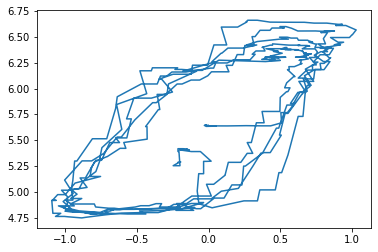

In [7]:
plt.plot(angles_filtered[:,2], capas_filtered['Capa3'])

### Train Test Split

In [8]:
split_idx = 400

# Calculate the difference for each capacitor column
diff_capas = capas_filtered.diff().dropna()

# Concatenate the difference DataFrame with the original capas DataFrame
capas_with_diff = pd.concat([capas_filtered.iloc[1:], diff_capas], axis=1)
capas_with_diff.columns = ['Capa1', 'Capa2', 'Capa3', 'Diff_Capa1', 'Diff_Capa2', 'Diff_Capa3']

capa_train, capa_test = capas_filtered[:split_idx], capas_filtered[split_idx:]
angle_train, angle_test = angles_filtered[:split_idx], angles_filtered[split_idx:]

capas_with_diff_train, capas_with_diff_test = capas_with_diff[:split_idx], capas_with_diff[split_idx:]
angle_with_diff_train, angle_with_diff_test = angles_filtered[1:split_idx+1], angles_filtered[split_idx+1:]

In [9]:
capa_test.shape

(115, 3)

### Linear regression

In [10]:
# Train the linear regression model
reg = LinearRegression().fit(capa_train, angle_train)

# Predict angles using the test data
angle_pred = reg.predict(capa_test)

# Evaluate the model
mae = mean_absolute_error(angle_test, angle_pred)
mae_tip = mean_absolute_error(angle_test[:,0], angle_pred[:,0])

print(f'Mean Absolute Error (Angle in rad): {mae:.2f}')
print(f'Tip Mean Squared Error (Angle in rad): {mae_tip:.2f}')

Mean Absolute Error (Angle in rad): 0.15
Tip Mean Squared Error (Angle in rad): 0.31


### Linear Regression with Kernel

In [11]:
# Train the linear regression model
reg = LinearRegression().fit(capas_with_diff_train, angle_with_diff_train)

# Predict angles using the test data
angle_pred = reg.predict(capas_with_diff_test)

# Evaluate the model
mae = mean_absolute_error(angle_with_diff_test, angle_pred)
mae_tip = mean_absolute_error(angle_with_diff_test[:,0], angle_pred[:,0])

print(f'Mean Absolute Error (Angle in rad): {mae:.2f}')
print(f'Tip Mean Absolute Error (Angle in rad): {mae_tip:.2f}')

Mean Absolute Error (Angle in rad): 0.10
Tip Mean Absolute Error (Angle in rad): 0.19


### RNN

In [26]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = self.init_hidden(x.size(0)).to(x.device)  # Initialize the hidden state

        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])

        return out.squeeze(1)  # Remove sequence dimension

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)


# Hyperparameters
input_size = 3
hidden_size = 128
output_size = 28
num_layers = 2
num_epochs = 500
learning_rate = 0.001
batch_size = 32
seq_length = 10

# device = torch.device("mps")

model = RNNModel(input_size, hidden_size, output_size, num_layers)
# model.to(device)

# Loss and optimizer
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
def create_sequences(input_data, output_data, seq_length):
    inputs = []
    outputs = []

    for i in range(len(input_data) - seq_length):
        inputs.append(input_data[i:i+seq_length])
        outputs.append(output_data[i+seq_length])

    return np.array(inputs), np.array(outputs)

# seq_length = 5

# Create sequences from the data
inputs_train_seq, outputs_train_seq = create_sequences(capa_train.values, angle_train, seq_length)
inputs_test_seq, outputs_test_seq = create_sequences(capa_test.values, angle_test, seq_length)

# Convert to PyTorch tensors and move to the appropriate device
inputs_train_tensor = torch.tensor(inputs_train_seq, dtype=torch.float32)
outputs_train_tensor = torch.tensor(outputs_train_seq, dtype=torch.float32)
inputs_test_tensor = torch.tensor(inputs_test_seq, dtype=torch.float32)
outputs_test_tensor = torch.tensor(outputs_test_seq, dtype=torch.float32)

train_dataset = TensorDataset(inputs_train_tensor, outputs_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(inputs_test_tensor, outputs_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# # Convert DataFrames to ndarrays
# capa_train_array = capa_train.values
# capa_test_array = capa_test.values
# angle_train_array = angle_train
# angle_test_array = angle_test

# # Truncate and reshape
# seq_length = 10

# # Truncate and reshape training data
# remainder = len(capa_train_array) % seq_length
# if remainder != 0:
#     capa_train_array = capa_train_array[:-remainder]
#     angle_train_array = angle_train_array[:-remainder]
# inputs_train = capa_train_array.reshape(-1, seq_length, 3)
# outputs_train = angle_train_array.reshape(-1, seq_length, 28)

# # Truncate and reshape testing data
# remainder = len(capa_test_array) % seq_length
# if remainder != 0:
#     capa_test_array = capa_test_array[:-remainder]
#     angle_test_array = angle_test_array[:-remainder]
# inputs_test = capa_test_array.reshape(-1, seq_length, 3)
# outputs_test = angle_test_array.reshape(-1, seq_length, 28)

In [28]:
# Assuming your data is in the variables `capa_train` and `angle_train`
# Adjust this part to load your data correctly
# Ensure your data is of type float32 for compatibility with PyTorch

# capa_train_tensor = torch.from_numpy(capa_train.to_numpy()).reshape(-1, seq_length, 3).float()  # Add sequence dimension
# angle_train_tensor = torch.from_numpy(angle_train).reshape(-1, seq_length, 28).float()  # Add sequence dimension

# dataset = TensorDataset(capa_train_tensor, angle_train_tensor)
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Train the model
# Training loop
print_interval = 1

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(train_loader)

    # Print the progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Evaluate the model on the test set
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs
            targets = targets

            # Forward pass
            outputs = model(inputs)

            # Calculate the loss
            loss = criterion(outputs, targets)

            test_loss += loss.item()

    # Calculate average test loss
    avg_test_loss = test_loss / len(test_loader)

    # Print the test loss
    print(f"Test Loss: {avg_test_loss:.4f}")



# Training loop
# for epoch in range(num_epochs):
#     # Forward pass
#     hidden = model.init_hidden(inputs_train_tensor.size(0))  # Initialize the hidden state
#     outputs = model(inputs_tensor)
    
#     # Reshape the outputs and targets for loss calculation
#     outputs = outputs.view(-1, output_size)  # Flatten the outputs
#     targets = outputs_train_tensor.view(-1, output_size)  # Flatten the targets
    
#     # Compute the loss
#     loss = criterion(outputs, targets)
    
#     # Backward pass and optimization
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     # Print training progress
#     if (epoch+1) % print_interval == 0:
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# print("Training finished!")

# for epoch in range(num_epochs):
#     for i in range(inputs_train_tensor.size(0)):
#         # Forward pass
#         inputs = inputs_train_tensor[i].clone().detach().unsqueeze(0)
#         outputs = outputs_train_tensor[i].clone().detach().unsqueeze(0)
        
#         # Compute the loss
#         loss = criterion(model(inputs), outputs)
        
#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#     # Print training progress
#     if (epoch+1) % print_interval == 0:
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# # Now you can evaluate the model using the test data
# capa_test_tensor = torch.from_numpy(capa_test.to_numpy()).reshape(-1, seq_length, 3).float()  # Add sequence dimension
# angle_test_tensor = torch.from_numpy(angle_test).reshape(-1, seq_length, 3).float()  # Add sequence dimension

Epoch [1/200], Loss: 0.2701
Test Loss: 0.2150
Epoch [2/200], Loss: 0.2544
Test Loss: 0.2263
Epoch [3/200], Loss: 0.2439
Test Loss: 0.2031
Epoch [4/200], Loss: 0.2291
Test Loss: 0.2212
Epoch [5/200], Loss: 0.2104
Test Loss: 0.1614
Epoch [6/200], Loss: 0.2276
Test Loss: 0.2131
Epoch [7/200], Loss: 0.2036
Test Loss: 0.1700
Epoch [8/200], Loss: 0.1953
Test Loss: 0.2147
Epoch [9/200], Loss: 0.2005
Test Loss: 0.1537
Epoch [10/200], Loss: 0.1841
Test Loss: 0.1983
Epoch [11/200], Loss: 0.2099
Test Loss: 0.1795
Epoch [12/200], Loss: 0.1690
Test Loss: 0.2186
Epoch [13/200], Loss: 0.1668
Test Loss: 0.1582
Epoch [14/200], Loss: 0.1525
Test Loss: 0.1083
Epoch [15/200], Loss: 0.1459
Test Loss: 0.2137
Epoch [16/200], Loss: 0.1663
Test Loss: 0.1359
Epoch [17/200], Loss: 0.1301
Test Loss: 0.1580
Epoch [18/200], Loss: 0.1224
Test Loss: 0.1280
Epoch [19/200], Loss: 0.1266
Test Loss: 0.1903
Epoch [20/200], Loss: 0.1582
Test Loss: 0.1372
Epoch [21/200], Loss: 0.1298
Test Loss: 0.1798
Epoch [22/200], Loss: 

Epoch [174/200], Loss: 0.0732
Test Loss: 0.1264
Epoch [175/200], Loss: 0.0872
Test Loss: 0.0958
Epoch [176/200], Loss: 0.0868
Test Loss: 0.0946
Epoch [177/200], Loss: 0.0831
Test Loss: 0.1030
Epoch [178/200], Loss: 0.0752
Test Loss: 0.0983
Epoch [179/200], Loss: 0.0716
Test Loss: 0.1032
Epoch [180/200], Loss: 0.0711
Test Loss: 0.1038
Epoch [181/200], Loss: 0.0764
Test Loss: 0.0867
Epoch [182/200], Loss: 0.0661
Test Loss: 0.0937
Epoch [183/200], Loss: 0.0685
Test Loss: 0.1085
Epoch [184/200], Loss: 0.0767
Test Loss: 0.0975
Epoch [185/200], Loss: 0.0762
Test Loss: 0.1039
Epoch [186/200], Loss: 0.0683
Test Loss: 0.1103
Epoch [187/200], Loss: 0.0713
Test Loss: 0.0985
Epoch [188/200], Loss: 0.0772
Test Loss: 0.0987
Epoch [189/200], Loss: 0.0706
Test Loss: 0.1040
Epoch [190/200], Loss: 0.0767
Test Loss: 0.1116
Epoch [191/200], Loss: 0.0804
Test Loss: 0.1067
Epoch [192/200], Loss: 0.0814
Test Loss: 0.0957
Epoch [193/200], Loss: 0.0952
Test Loss: 0.1126
Epoch [194/200], Loss: 0.0946
Test Loss:

In [20]:
with torch.no_grad():
    model.eval()
    total_mae = 0.0

    for inputs, targets in test_loader:
        inputs = inputs
        targets = targets

        outputs = model(inputs)

        # Calculate the MAE
        mae = torch.abs(outputs - targets).mean()

        total_mae += mae.item()

    avg_mae = total_mae / len(test_loader)

print(f"Mean Absolute Error (MAE): {avg_mae:.4f}")



Mean Absolute Error (MAE): 0.1291


In [ ]:
predictions_test[:,23] - outputs_test_tensor[:,23]

### Forward Kinematics to Calculate Error

In [ ]:
angle_with_diff_test.to_numpy().shape

In [ ]:
def cal_tip_error(angle_pred, angle_test):
    angle_np = angle_test.to_numpy()
    

In [ ]:
import numpy as np

urdf = [0.0410297210859283, 0.00132488253734261, 0.00131520544017122, \
        0.00130552834300195, 0.00129585124582631, 0.00128617414865916, \
        0.00127649705148352, 0.00126681995431425, 0.00125714285714286, \
        0.00124746575997359, 0.00123778866279794, 0.00122811156562867, \
        0.00121843446845728, 0.00120875737128587, 0.00119908027411451, \
        0.0011894031769431, 0.0011797260797717, 0.00117004898260031, \
        0.00116037188542892, 0.00115069478825752, 0.00114101769108614, \
        0.00113295011421438, 0.00112972108592831, 0.00112972108593046, \
        0.00112972108592616, 0.00112972108592835, 0.00112972108592829, \
        0.0025297210859283]

urdf_real_length = [x * 3000 for x in urdf]
links = np.c_[np.zeros((27,1)), urdf_real_length[1:]]

def snakePos(thetas, links):
    joints = np.array([[0,0]])
    ori = np.eye(2)
    for (theta, link) in zip(thetas, links):
        R = rotMtx2d(theta)
        ori = R@ori
        joints = np.vstack([joints, joints[-1] + ori@link.T])
    return joints.T

def rotMtx2d(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s], [s, c]])

def T2D(R, t):
    T = np.eye(3)
    T[0:2, 0:2] = R
    T[0:2, 2] = t
    return T

# links = np.array([[0, 1]]*27)
thetas = [np.pi/60]*27
pos = snakePos(thetas, links)
plt.plot(pos[0],pos[1],'s-',color = 'r', label="ATT-RLSTM")
ax = plt.gca()
ax.set_aspect(1)